In [108]:
#Trying to predicting whether given image is dandelion or not

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [48]:
image_dir=Path('/kaggle/input/dandelionimages/Images')


# Creating File DataFrame

In [64]:
filepaths=list(image_dir.glob(r'**/*.jpg'))
filepaths=list(map(lambda x:str(x),filepaths))

In [65]:
filepaths

['/kaggle/input/dandelionimages/Images/other/IMG_6833.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6253.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6818.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5506.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5858.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5892.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6209.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6826.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5826.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5499.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6220.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5738.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6030.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6262.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_5888.jpg',
 '/kaggle/input/dandelionimages/Images/other/IMG_6214.jpg',
 '/kaggle/input/dandelionimages/Images/o

In [66]:
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))



filepaths=pd.Series(filepaths,name='Filepath')
labels=pd.Series(labels,name='Label')
image_df=pd.concat([filepaths,labels],axis=1)

In [67]:
image_df['Filepath'][0]

'/kaggle/input/dandelionimages/Images/other/IMG_6833.jpg'

In [68]:
train_df,test_df=train_test_split(image_df,train_size=0.7,shuffle=True,random_state=1)

In [53]:
print(train_df.shape)
print(test_df.shape)

(883, 2)
(379, 2)


# Creating Generators

In [69]:
train_generator=ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2

)



test_generator=ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [98]:
train_images=train_generator.flow_from_dataframe(
dataframe=train_df,
x_col='Filepath',
y_col='Label',
target_size=(224,224),
color_mode='rgb',
class_mode='binary',
batch_size=32,
shuffle=True,
seed=42,
subset='training'

)

val_images=train_generator.flow_from_dataframe(
dataframe=train_df,
x_col='Filepath',
y_col='Label',
target_size=(224,224),
color_mode='rgb',
class_mode='binary',
batch_size=32,
shuffle=True,
seed=42,
subset='validation'

)




test_images=test_generator.flow_from_dataframe(
dataframe=test_df,
x_col='Filepath',
y_col='Label',
target_size=(224,224),
color_mode='rgb',
class_mode='binary',
batch_size=32,
shuffle=True,
)

Found 707 validated image filenames belonging to 2 classes.
Found 176 validated image filenames belonging to 2 classes.
Found 379 validated image filenames belonging to 2 classes.


# Downloading the Feature Extractor

In [76]:
feature_extractor=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    weights='imagenet',
    include_top=False,
    pooling='avg'
)

feature_extractor.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


# Training the Model

In [79]:
inputs=feature_extractor.input
x=tf.keras.layers.Dense(128,activation='relu')(feature_extractor.output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)


model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

# Training the Model

In [80]:
history=model.fit(train_images,validation_data=val_images,
                 epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])

Epoch 1/100
23/23 [==============================] - 213s 9s/step - loss: 0.4889 - accuracy: 0.7397 - val_loss: 0.4231 - val_accuracy: 0.7898
Epoch 2/100
23/23 [==============================] - 146s 6s/step - loss: 0.3122 - accuracy: 0.8656 - val_loss: 0.4152 - val_accuracy: 0.7784
Epoch 3/100
23/23 [==============================] - 146s 6s/step - loss: 0.2524 - accuracy: 0.8939 - val_loss: 0.3750 - val_accuracy: 0.8352
Epoch 4/100
23/23 [==============================] - 146s 6s/step - loss: 0.2417 - accuracy: 0.8967 - val_loss: 0.3795 - val_accuracy: 0.8068
Epoch 5/100
23/23 [==============================] - 144s 6s/step - loss: 0.2085 - accuracy: 0.9180 - val_loss: 0.5279 - val_accuracy: 0.7784
Epoch 6/100
23/23 [==============================] - 149s 7s/step - loss: 0.1552 - accuracy: 0.9349 - val_loss: 0.5112 - val_accuracy: 0.8352


# Results

In [99]:
 prediction=np.squeeze(model.predict(test_images))

          

12/12 [==============================] - 80s 7s/step


In [100]:
prediction=np.squeeze((prediction>0.5).astype(np.int))
prediction

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [101]:
prediction.shape

(379,)

In [102]:
y_test=test_df['Label'].replace({'dandelion':1,'other':0})

In [103]:
y_test=np.array(y_test)
y_test.shape

(379,)

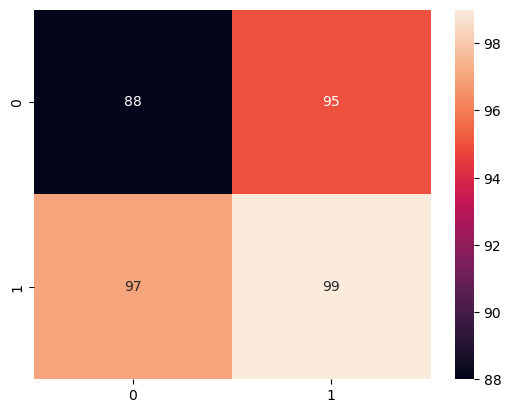

In [109]:
cm=confusion_matrix(prediction,y_test)
sns.heatmap(cm,annot=True)
plt.show()

In [111]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
file.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......add
.........vars
......add_1
.........vars
......add_2
.........vars
......add_3
.........vars
......add_4
.........vars
......add_5
.........vars
......add_6
.........vars
......add_7
.........vars
......add_8
.........vars
......add_9
.........vars
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_10
.........vars
............0
............1
............2
............3
......batch_normalization_11
.........vars
............0
............1
............2
............3
......batch_normalization_12
.........vars
............0
............1
............2
............3
......batch_normalization_13
.........vars
............0
............1
............2
............3
......batch_normalization_14
.........vars
............0
............1
.....